In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Principal Component Analysis

Load and plot the "PCA.csv" data:

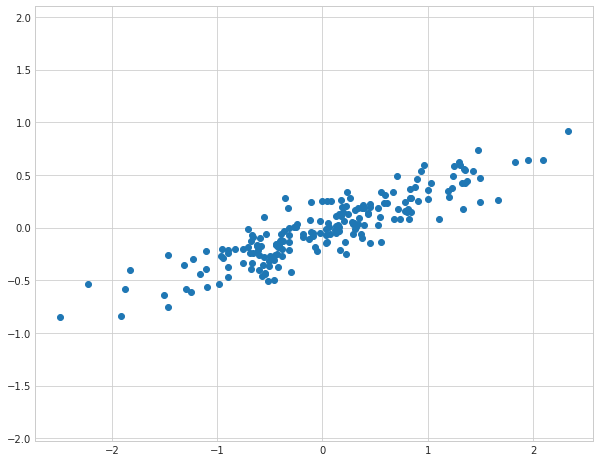

In [2]:
X1 = np.genfromtxt('PCA.csv',delimiter=',')
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    plt.scatter(X1[:, 0], X1[:, 1])
    plt.axis('equal');

Use sklearn's PCA to find 2 principal components on the X

In [5]:
# TODO 
# Fit a PCA with 2 components on the X (n_components=2)
pca = PCA(n_components=2)
pca.fit(X1)

PCA(n_components=2)

In [ ]:
print(pca.components_)

Print the explained variance of the eigenvectors:

In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Draw the eigenvectors and the transformed datapoints:

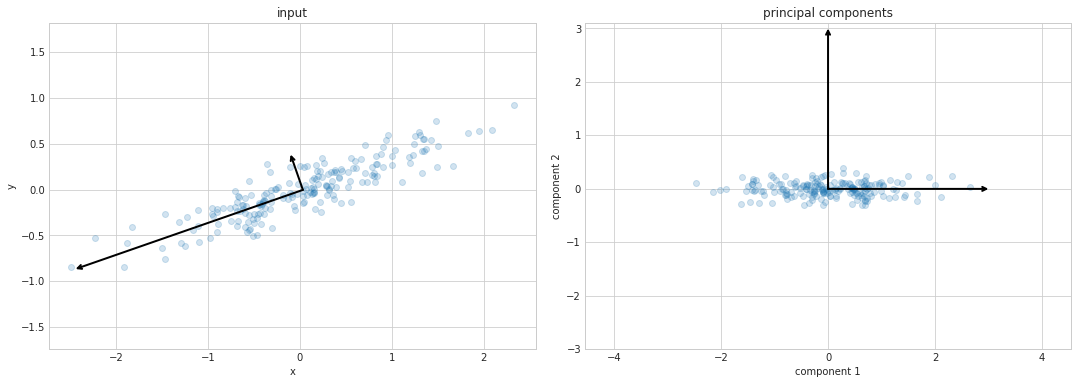

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

    # plot data
    ax[0].scatter(X1[:, 0], X1[:, 1], alpha=0.2)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
    ax[0].axis('equal');
    ax[0].set(xlabel='x', ylabel='y', title='input')

    # plot principal components
    X_pca = pca.transform(X1)
    ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
    draw_vector([0, 0], [0, 3], ax=ax[1])
    draw_vector([0, 0], [3, 0], ax=ax[1])
    ax[1].axis('equal')
    ax[1].set(xlabel='component 1', ylabel='component 2',
              title='principal components',
              xlim=(-5, 5), ylim=(-3, 3.1))

Fit a sklearn PCA with only the first eigenvector:

In [16]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X1)
print("original shape:   ", X1.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Transform the X_pca back to 2 dimensions using pca.inverse_transform

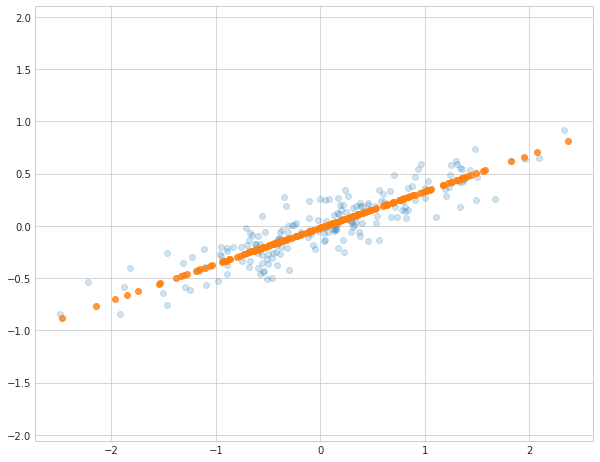

In [18]:
# TODO
# transform the X_pca back to two dimensions using pca.inverse_transform
X_new = pca.inverse_transform(X_pca)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');

Load the Iris dataset

In [19]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


extract features and labels in X2 and y2

In [25]:
# TODO
# Extract features and labels
X2 = df[['sepal_len', 'sepal_wid','petal_len', 'petal_wid']].to_numpy()
y2 = df['class'].to_numpy()

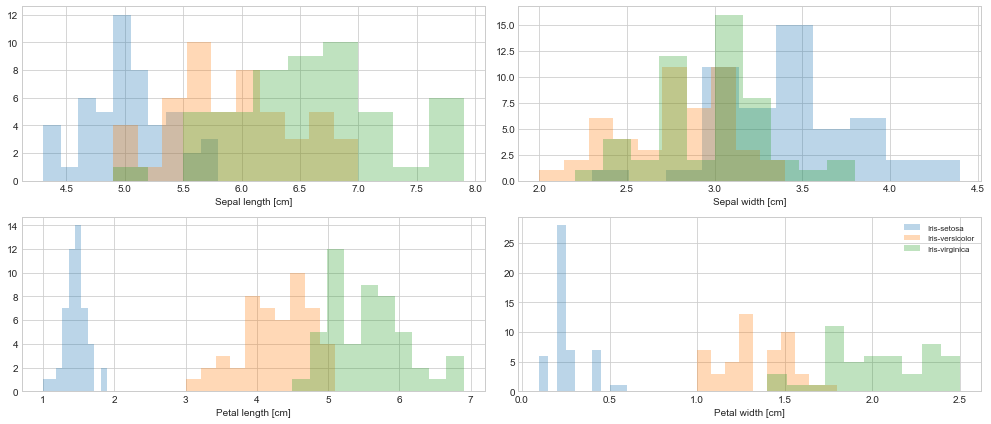

In [27]:
from matplotlib import pyplot as plt
import numpy as np
import math

def plot_histograms(X, y):
  label_dict = {1: 'Iris-Setosa',
                2: 'Iris-Versicolor',
                3: 'Iris-Virgnica'}

  feature_dict = {0: 'Sepal length [cm]',
                  1: 'Sepal width [cm]',
                  2: 'Petal length [cm]',
                  3: 'Petal width [cm]'}

  with plt.style.context('seaborn-whitegrid'):
      plt.figure(figsize=(14, 6))
      for cnt in range(4):
          plt.subplot(2, 2, cnt+1)
          for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
              plt.hist(X[y==lab, cnt],
                       label=lab,
                       bins=10,
                       alpha=0.3,)
          plt.xlabel(feature_dict[cnt])
      plt.legend(loc='upper right', fancybox=True, fontsize=8)

      plt.tight_layout()
      plt.show()

plot_histograms(X2, y2)

Standardize the datapoints using StandardScaler:

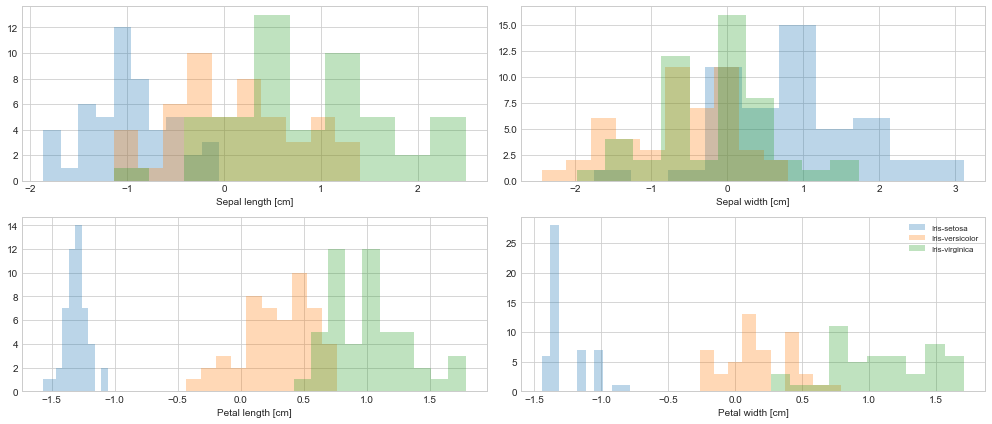

In [30]:
from sklearn.preprocessing import StandardScaler
# TODO
scaler = StandardScaler()
# Standardize the data and assign them to X_std
X_std = scaler.fit_transform(X2)
plot_histograms(X_std, y2)

Compute the covariance matrix

In [31]:
# TODO
# Complete the comput_cov using the formula given in the PDF file
def comput_cov(X):
    mean_vec = np.dot(X.T, X)
    cov_mat = (1/len(X)) * mean_vec
    return cov_mat
cov_mat = comput_cov(X_std)
print("Covariance matrix: \n%s" %comput_cov(X_std) )

Covariance matrix: 
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [65]:
def Sort_eigens(cov_mat):
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)

    print('Eigenvectors \n%s' %eig_vecs)
    print('\nEigenvalues \n%s' %eig_vals)
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(val, vec) for val, vec in zip(eig_vals, eig_vecs)]

    # Sort the (eigenvalue, eigenvector) tuples from high to low -> based on eigenvalue
    eig_pairs = sorted(eig_pairs, reverse=True)
    return eig_pairs
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = Sort_eigens(cov_mat)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]
Eigenvalues in descending order:
2.9108180837520528
0.9212209307072246
0.14735327830509548
0.02060770723562544


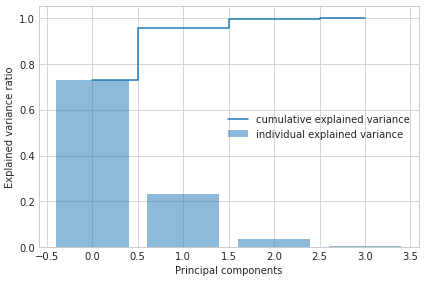

In [66]:
# TODO
# compute the explained and cumulative explained variance
eig_sum = sum(val for val , _ in eig_pairs)
var_exp = [(val/eig_sum) for val , _ in eig_pairs]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


Implement MY_PCA() for full PCA procedure:

In [102]:
def My_PCA(X,n_components):
    cov_mat = comput_cov(X)
    eig_pairs = Sort_eigens(cov_mat)
    matrix_wT = [] # initialize matrix_w
    for i in range(n_components): # pick the first n eigen vectors from the sorted eig_pairs
        matrix_wT.append(eig_pairs[i][1]) 
    matrix_wT = np.array(matrix_wT)
    matrix_w = matrix_wT.T
    # print(matrix_w.shape)
    print('Matrix W:\n %s' %matrix_w)
    Z = np.dot(X, matrix_w) # reduce the dimensions of X and assign them to Z
    return Z
Z = My_PCA(X2,2)

Eigenvectors 
[[ 0.75116805  0.28583096  0.49942378  0.32345496]
 [ 0.37978837  0.54488976 -0.67502499 -0.32124324]
 [ 0.51315094 -0.70889874 -0.05471983 -0.48077482]
 [ 0.16787934 -0.34475845 -0.54029889  0.74902286]]

Eigenvalues 
[6.13768706e+01 2.09402049e+00 8.02401290e-02 2.35354111e-02]
Matrix W:
 [[ 0.75116805  0.37978837]
 [ 0.28583096  0.54488976]
 [ 0.49942378 -0.67502499]
 [ 0.32345496 -0.32124324]]


Perform PCA from sklearn and see if the results match

In [99]:
# TODO
# use sklearn pca on iris data
pca = PCA(n_components=2)
sklearn_pca = pca.fit_transform(X2)
Z_sklearn = My_PCA(X2, 2)


Eigenvectors 
[[ 0.75116805  0.28583096  0.49942378  0.32345496]
 [ 0.37978837  0.54488976 -0.67502499 -0.32124324]
 [ 0.51315094 -0.70889874 -0.05471983 -0.48077482]
 [ 0.16787934 -0.34475845 -0.54029889  0.74902286]]

Eigenvalues 
[6.13768706e+01 2.09402049e+00 8.02401290e-02 2.35354111e-02]
Matrix W:
 [[ 0.75116805  0.37978837]
 [ 0.28583096  0.54488976]
 [ 0.49942378 -0.67502499]
 [ 0.32345496 -0.32124324]]


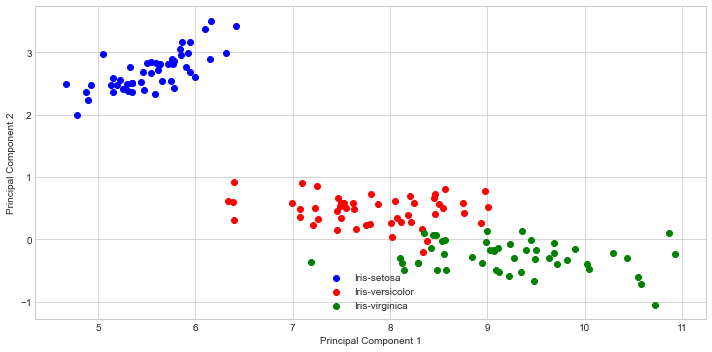

In [100]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Z_sklearn[y2==lab, 0],
                    Z_sklearn[y2==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

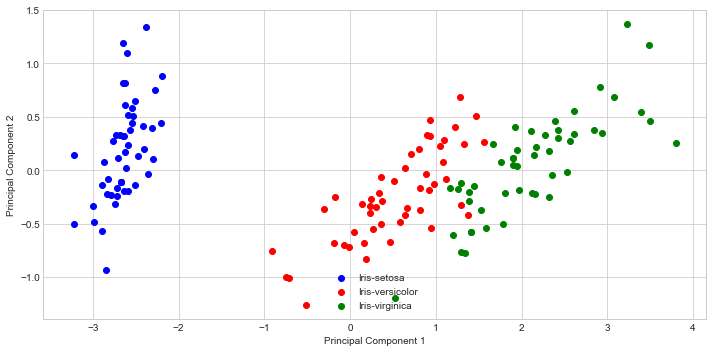

In [89]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(sklearn_pca[y2==lab, 0],
                    sklearn_pca[y2==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

Perform your PCA on the X1 from the "PCA.csv" dataset with 1 dimension as well and compare it with X_pca 

In [ ]:
# TODO
# perform PCA with 1 principal component on the X1 and compare it with X_pca



# Autoencoders for dimensionality reduction

Load the fashion mnist.

In [ ]:
from keras.datasets import fashion_mnist
(data, labels), (_, _) = fashion_mnist.load_data()

In [ ]:
data = data.reshape(-1, 28*28) / 255. # scale the data features

In [ ]:
from keras import models, layers
#TODO
# complete the function below for autoencoder
def dim_red_ae(data,n_dims_encoded=2):
    input_layer = layers.Input(shape=(...,))
    encoding_layer = layers.Dense(.....,activation=...)(.....)
    decoding_layer = layers.Dense(.....,activation=...) (......)
    autoencoder = models.Model(....., .....)
    autoencoder.compile('adam', loss='mse')
    autoencoder.fit(x = ...., y = ...., epochs=...)
    encoder = models.Model(......, .......)
    return encoder,autoencoder

In [ ]:
encoder,autoencoder = dim_red_ae(data,n_dims_encoded=2)
encodings = encoder.predict(data)

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(encodings[:, 0], encodings[:, 1], c=labels)
plt.colorbar()

In [ ]:
img = autoencoder.predict(data)
img = img[0].reshape(28,28)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(1,2)
ax[0].imshow(data[0].reshape(28,28),cmap="Greys")
ax[1].imshow(img, cmap="Greys")

Train and run the autoencoder for 100 dimensions of the hidden layer:

In [ ]:
#TODO
encoder,autoencoder = ....
img = autoencoder.predict(data)
img = img[0].reshape(28,28)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(1,2)
ax[0].imshow(data[0].reshape(28,28),cmap="Greys")
ax[1].imshow(img, cmap="Greys")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(data[:10000],labels[:10000])

In [ ]:
#TODO
# train and predict a KNN with K=3 on the training and test set and measure the time it takes.
import time
....

perform cross validation to find the best number of hidden dimensions for hidden layer for dimensionality recudtion:

In [ ]:
from sklearn.model_selection import cross_val_score
# TODO
# Perform K-fold cross validation with 5 folds to find the best number of hidden dimensions of autoencoder 
# for dimentionality reduction
acc_list = []
possible_dims = [2,5,7,10,15,20]
for dims in possible_dims:
    print("training for %d dimensions"%dims)
    ....
    ....
    ....
    ....
    print("for %d dims scores are :"%dims,scores)
    print("=========================================")
best_dim = ....

perform model evaluation with best_dim on the test set and measure the time of training and predicting of KNN (K=3)

In [ ]:
# TODO
# model evaluation on the test set.
......

......